In [8]:
from scipy.stats import *
from math import factorial

import matplotlib.pyplot as plt
import numpy as np
import random

## Distribution Analysis
Outlined below, we have our tool for analyzing/comparing discrete and continuous distributions. This approach in comparing two distributions may be naive, although I believe it is helpful due to its simple and intuitive nature.

In [42]:
def discrete_distribution_analysis(distrb_name, scipy, custom):
    """
    Given input of distribution name, known distribution, and custom distribution:
    the acossiated bincounts and distribution graphs are displayed
    """
    unique_length = len(set(scipy))

    print("Scipy's", distrb_name, "rv output frequency: ", np.bincount(scipy))
    print("Custom", distrb_name, "rv output frequency:  ", np.bincount(custom))

    fig, axs = plt.subplots(1, 2)
    plt.setp(axs, xticks = np.arange(unique_length))
    
    axs[0].hist(scipy, bins = unique_length)
    axs[0].set_title("Scipy " + distrb_name)
    
    axs[1].hist(custom, bins = unique_length)
    axs[1].set_title("Custom " + distrb_name)

In [82]:
def continuous_distribution_analysis(distrb_name, scipy, custom):
    """
    Given input of distribution name, known distribution, and custom distribution:
    the acossiated statistics and distribution graphs are displayed
    """
    unique_length = len(set(scipy))

    print("Scipy's", distrb_name, "rv mean:", format(np.mean(scipy), '.3f'))
    print("Custom", distrb_name, "rv mean:", format(np.mean(custom), '.3f'))
    print("Scipy's", distrb_name, "rv stdev:", format(np.std(scipy), '.3f'))
    print("Custom", distrb_name, "rv stdev:", format(np.std(custom), '.3f'))

    fig, axs = plt.subplots(1, 2)

    axs[0].hist(scipy, bins = 10)
    axs[0].set_title("Scipy " + distrb_name)

    axs[1].hist(custom, bins = 10)
    axs[1].set_title("Custom " + distrb_name)

## The Binomial Distribution
We can describe this distribution as: performing n <strong>independent</strong> bernoulli trials with a probability p of success<br>
Math and Code inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [45]:
def binomial(n, p):
    return bernoulli.rvs(size=n, p=p)

In [46]:
def custom_binomial(n, p):
    """
    n = number of samples
    p = probability of "success"
    """
    
    data = np.zeros(n)
    for i in range(n):
        continuous_value = random.random()
        if continuous_value > p:
            data[i] = 0
        else:
            data[i] = 1
    
    return data.astype('int64')

Scipy's binomial rv output frequency:  [7521 2479]
Custom binomial rv output frequency:   [7634 2366]


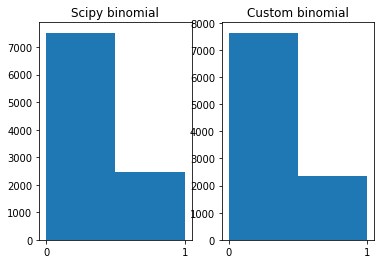

In [47]:
discrete_distribution_analysis("binomial", binomial(10_000, 0.25), custom_binomial(10_000, 0.25))

## The Hypergeometric Distribution
We can describe this distribution as: performing n <strong>dependent</strong> trials with n successes and M total items in a "group" or "bag"
<br>
Math and Code inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html


In [48]:
def hypergeometric(M, n, N, size=1):
    return hypergeom.rvs(M, n, N, size=size)

In [49]:
def custom_hypergeometric(M, n, N, size=1):
    """
    M = total items in sample
    n = number of "success" in sample
    N = size of items chosen
    """
    
    pmf = np.array([p_hypergeo(M, n, N, i) for i in range(n+1)])
    cdf = [sum(pmf[:i+1]) for i in range(len(pmf))]
    
    data = np.zeros(size)
    for i in range(size):
        continuous_value = random.random()
        data[i] = np.min(np.where(np.less(continuous_value, cdf) == True))
    
    return data.astype('int64')

    
def p_hypergeo(M, n, N, k):
    """
    definition of the hypergeometric probability mass function
    """
    
    return (bin_coef(n, k) * bin_coef(M - n, N - k)) \
            / bin_coef(M, N)
    
    
def bin_coef(n, k):
    """
    helper function to get binomial coefficients
    """
    
    return factorial(n) / (factorial(k) * factorial(n - k))

Scipy's hypergeometric rv output frequency:  [ 502 3548 4765 1185]
Custom hypergeometric rv output frequency:   [ 450 3571 4805 1174]


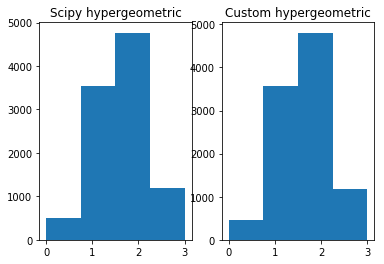

In [50]:
discrete_distribution_analysis("hypergeometric", hypergeometric(9, 3, 5, 10_000),  custom_hypergeometric(9, 3, 5, 10_000))

## Geometric
We can describe this distribution as: performing <strong>independent</strong> trials until we receive our first success <br>
Math and Code inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html

In [51]:
def geometric(p, size=1):
    return geom.rvs(p, size=size) - 1

In [52]:
def custom_geometric(p, size=1):
    """
    p = probability of success
    """
    
    data = np.zeros(size)
    for i in range(size):
        
        count = 0
        continuous_value = 1
        while continuous_value > p:
            count += 1
            continuous_value = random.random()
        data[i] = count - 1
    
    return data.astype('int64')

Scipy's geometric rv output frequency:  [574 271  98  35  12   4   1   5]
Custom geometric rv output frequency:   [608 235  88  36  18  12   2   1]


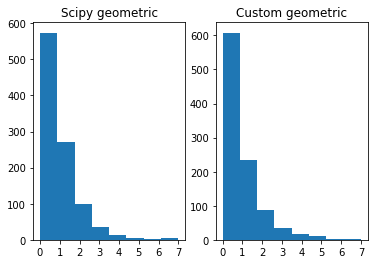

In [53]:
discrete_distribution_analysis("geometric", geometric(0.6, 1000),  custom_geometric(0.6, 1000))

## Negative Binomial
We can describe this distribution as: performing <strong>independent</strong> trials until we receive n success <br>
Math and Code inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html

In [54]:
def negative_binomial(n, p, size=1):
    return nbinom.rvs(n, p, size=size)

In [55]:
def custom_negative_binomial(n, p, size=1):
    data = np.zeros(size)
    for j in range(size):
        attempts = 0
        for i in range(n):
            attempts += custom_geometric(p)
        data[j] = attempts
    return data.astype('int64')

Scipy's negative_binomial rv output frequency:  [1129 2145 2336 1872 1232  647  351  174   61   34   15    2    2]
Custom negative_binomial rv output frequency:   [1096 2148 2387 1866 1233  680  326  147   73   26   10    7    1]


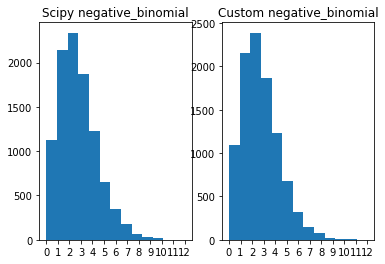

In [70]:
discrete_distribution_analysis("negative_binomial", negative_binomial(10, 0.8, size=10_000),  custom_negative_binomial(10, 0.8, size=10_000))

## Poisson
We can describe this distribution as: the probability an event occurs n times given an observation of the event occurring m times over a fixed interval <br>
Math and Code inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [71]:
def p(lam, size=1):
    return poisson.rvs(lam, size=size)

In [72]:
def custom_poisson(lam, size=1):
    """
    lam = number of event occurences over given interval
    """
    
    pmf = np.array([p_y(lam, i) for i in range(lam * 10)])
    cdf = [sum(pmf[:i+1]) for i in range(len(pmf))]
    
    data = np.zeros(size)
    for i in range(size):
        continuous_value = random.random()
        data[i] = np.min(np.where(np.less(continuous_value, cdf) == True))
    
    return data.astype('int64')

def p_y(lam, y):
    return ((lam ** y) * np.exp(-lam)) / factorial(y)

Scipy's poisson rv output frequency:  [  64  338  838 1380 1771 1766 1462 1071  633  367  172   84   33   17
    2    2]
Custom poisson rv output frequency:   [  73  348  825 1425 1763 1741 1401 1038  710  358  172   82   36   20
    4    4]


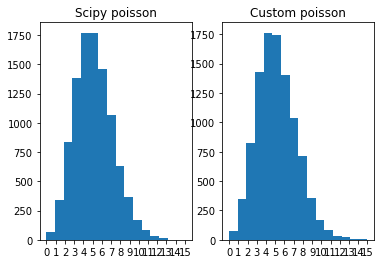

In [77]:
discrete_distribution_analysis("poisson", p(5, 10_000), custom_poisson(5, 10_000))

## Uniform
We can describe this distribution as: an equal probability for all values of x in a <strong>continuous</strong> range (a, b) <br>
Math and Code inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

In [78]:
def u(a, b, size=1):
    return (uniform.rvs(size=size) * (b - a) + a)

In [79]:
def custom_u(a, b, size=1):
    data = np.zeros(size)
    for i in range(size):
        data[i] = (random.random() * (b - a) + a) 
    return data

Scipy's uniform rv mean: 0.503
Custom uniform rv mean: 0.501
Scipy's uniform rv stdev: 0.286
Custom uniform rv stdev: 0.288


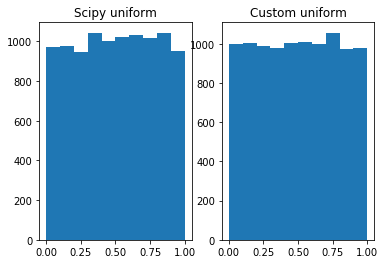

In [84]:
continuous_distribution_analysis("uniform", u(0,1, 10000), custom_u(0,1, 10000))

## Normal
We can describe this distribution as: the most famous distribution, popularly found using the central limit theorem <br>
Math and Code inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [85]:
def normal(size=1):
    return norm.rvs(size=size)

In [86]:
def custom_normal(size = 1):
    
    data = np.zeros(size)
    for i in range(size):
        data[i] = np.mean(custom_u(0, 1, 10))
    return (data - 0.5) / np.std(data)

Scipy's uniform rv mean: -0.012
Custom uniform rv mean: -0.016
Scipy's uniform rv stdev: 1.005
Custom uniform rv stdev: 1.000


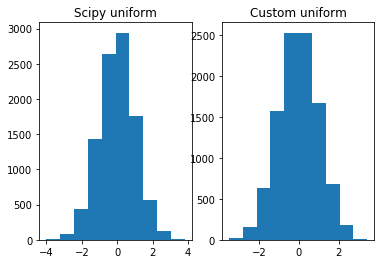

In [87]:
continuous_distribution_analysis("uniform", normal(10000), custom_normal(10000))